# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [4]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [5]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [17]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [61,25,17]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,35942,38369,59598,3254,26701,2017
1,16165,4230,7595,201,4003,57
2,5876,6157,2933,839,370,4478


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

##### Customer of index 61: Large Supermarket

This customer buys large quantities of all the goods, especially food-oriented goods, like Fresh, Milk (dairy), and Groceries, and apparently provides deli services -- hence the Delicatessen above-average spendings. In addition, this urban market provides house supplies (way more than average detergent and paper supplies) and a good amount of Frozen goods.

My assumption of this customer being a large urban supermarket is also backed up by looking at the mean values. This customer spends way more than average in all goods, except perhaps Frozen, but this can be viewed as having a small Frozen department, but a way larger Fresh department: an "Organic Supermarket" perhaps. 

In particular, this customer in comparison to an average one, spends:

1) Almost 300% more on Fresh (or ~3 times more)

2) More than 660% on Milk (or ~6.6 times more)

3) About 195% more on Grocery (or ~2 times more)

4) About 920% more on Detergent and Paper supplies (or ~10 times more)

5) More than 130% on Delicatessen (or ~1.3 times more)


##### Customer of index 25: Bed and Breakfast

This customer buys a good amount of Fresh and Grocery, some dairy products (Milk), a lot of Detergent and Paper supplies, and very few Delicatessen and Frozen products. Intuitively, a bed and breakfast customer is expected to need a lot of Detergent and Paper supplies for daily cleaning activities, above-average spendings on certain food types for breakfast and dinner, and perhaps very little spendings on Frozen goods and Delicatessen, since there is no need for either in a Bed and Breakfast that provides breakfast and dinner -- but there still could be a mini-fridge in case someone wants to get a sandwich.

In particular, this customer in comparison to an average one, spends:

1) Almost 135% more on Fresh (or ~1.3 times more)

2) More than 70% on Milk (or ~0.7 times less)

3) About 247% more on Grocery (or ~2.47 times more)

4) About 138% more on Detergent and Paper supplies (or ~1.3 times more)

5) About 3% on Delicatessen (or ~0.03 times less)

These results makes sense for a medium-sized B&B since it is expected to consume more than average food to feed its customers, more than average cleaning supplies to clean the estate daily, and less than average Frozen and Delicatessen supplies, cause there is no need to buy frozen food to cook yourself in a B&B, nor to prefer deli food over cooked food.


##### Customer of index 97: Neighborhood Deli/Grocery

On average, a small neighborhood Deli/Grocery store provides basic household supplies, cold sandwiches and snacks (Delicatessen), and other food supplies. The spendings on the underlying features seem analogous to those of such a store. That is, mostly Fresh, Milk, and Grocery types of food, some detergent and paper supplies, Frozen food, and of course a decent amount of Delicatessen products. 

The proportions of these goods look convincing, at least at the first glance. In detail, this customer's supply needs consist of 28.4% Fresh, 29.8% Milk, 14.2% Grocery, 4% Frozen, 1.7% Detergent and Paper, and 21.5% Delicatessen. That makes sense for a small neighborhood convenience store (Deli).

This customer in comparison to an average one, spends:

1) Almost 49% less on Fresh (or ~0.49 times less)

2) More than 106% on Milk (or ~1.06 times more)

3) About 95% less on Grocery (or ~0.95 times less)

4) About 12% less on Detergent and Paper supplies (or ~0.12 times less)

5) About 293% on Delicatessen (or ~2.93 times more)


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

Prediction score on test set:  0.795768311576


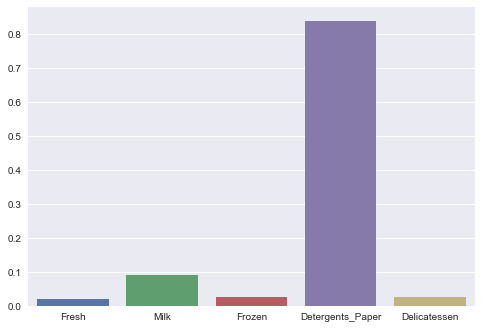

In [84]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop("Grocery", axis=1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, data["Grocery"], test_size=0.25, random_state=1)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=1).fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print("Prediction score on test set: ", score)

import seaborn as sns
sns.barplot(X_train.columns, regressor.feature_importances_)

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that leads us to believe that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

1) I decided to predict "Grocery" feature, because intuitively it includes "Milk", "Fresh", "Frozen", and to some extend "Detergent and Paper". Grocery shopping has the meaning of food/basic supplies shopping, and thus I think it is a little redundant as a feature.

2) The reported predicted score on a scale of 0-1, with random-state=1 is 0.7957, a rather upper-tier score.

3) The closer the score of this feature is to 1, the less relevant it is for prediction of customers' habbits. That means, with a 79% r^2 score, I would feel safe to drop it from the model and improve speed instead, but at the same time I would also be careful about it. To feel completely confident to drop a feature, I would expect its r^2 score to be over 85%.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

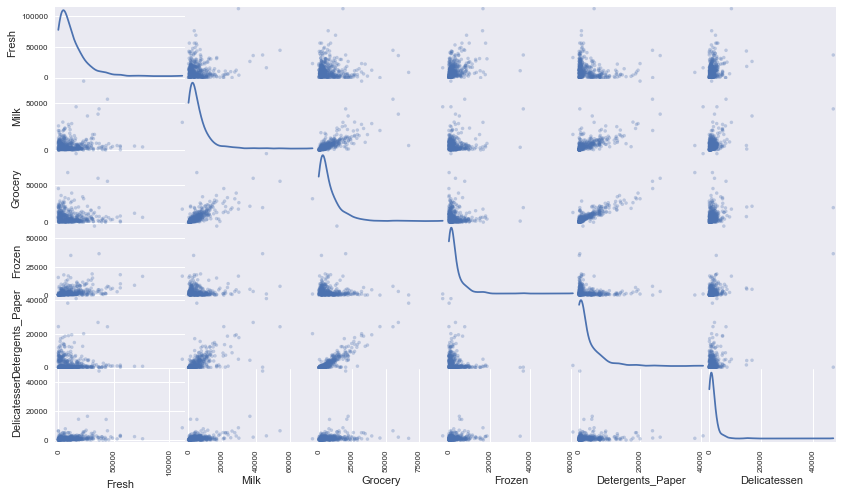

In [89]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

The **dataset distribution** looks like a left-skewed normal distribution with mean values of the features in [2800 - 12000] range, and skewness about the mode -- most frequent values, which looks like it is between [2000 - 5000]. Of course, there are a few outliers, since the normal distribution is famous for having them, which are the sparse -> isolated data in each box plot.

Looking at the scatter plot above, we need to identify which **pairs of features are strongly correlated**, which will help us decide which one is redundant and which is not. That is, if two features are strongly correlated i.e. x1 = f(x2) + c, then we don't really need on of the two, and we instead pick the one that kind of encapsulates the other. 

That being said, the pairs of features that exhibit correlation are:

1) { Groceries, Detergent_Paper } i.e. if you buy groceries you are likely to buy detergent and paper supplies

2) { Groceries, Milk } i.e. if you buy groceries you are likely to buy Milk products

3) { Detergent_Paper, Milk } i.e. if you buy detergent and paper you are likely to buy Milk. 

Although Detergent_Paper and Milk are intuitively irrelevant, one can argue that it makes sense to assume that they are correlated because they are both under the umbrella of Grocery, presumably.

This result **confirms my earlier assumptions** and the r^2 score I obtained above about the relevance of Grocery feature. Apparently it is indeed enough correlated to Milk and Detergent_Paper, and it looks like we need to remove it from our model, as it will add little value in the results. Instead, we are willing to sacrifice its added value and get faster computations and more data / dimenstions i.e. same data with fewer dimensions. 

In particular, let's confirm the above correlations of the features:

In [26]:
print(data.corr())

                     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicatessen      0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicatessen  
Fresh                 0.244690  
Milk                  0.406368  
Grocery               0.205497  
Frozen                0.390947  
Detergents_Paper      0.069291  
Delicatessen          1.000000  


Indeed, the correlations of the observed pairs above are:

1) Correlation(Grocery, Detergent_Paper) = 0.9246

2) Correlation(Grocery, Milk) = 0.7283

3) Correlation(Milk, Detergent_Paper) = 0.6618 ~> not strongly correlated, but better than the other features' correlations

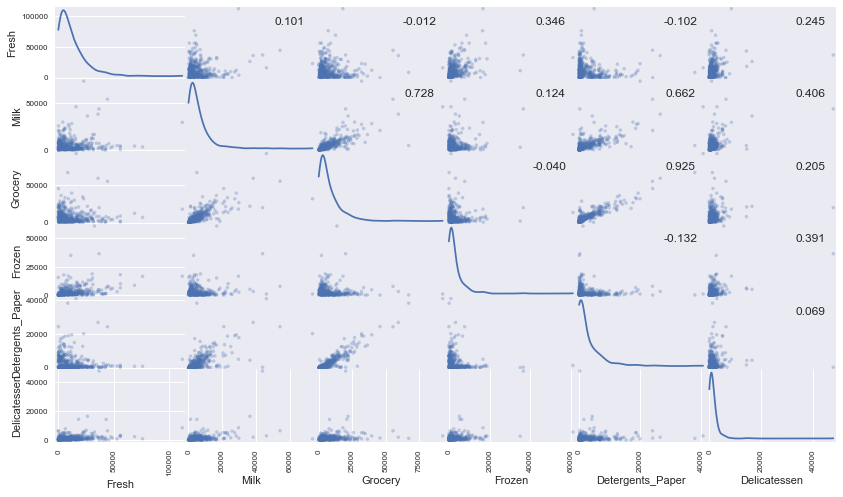

In [87]:
axes = pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

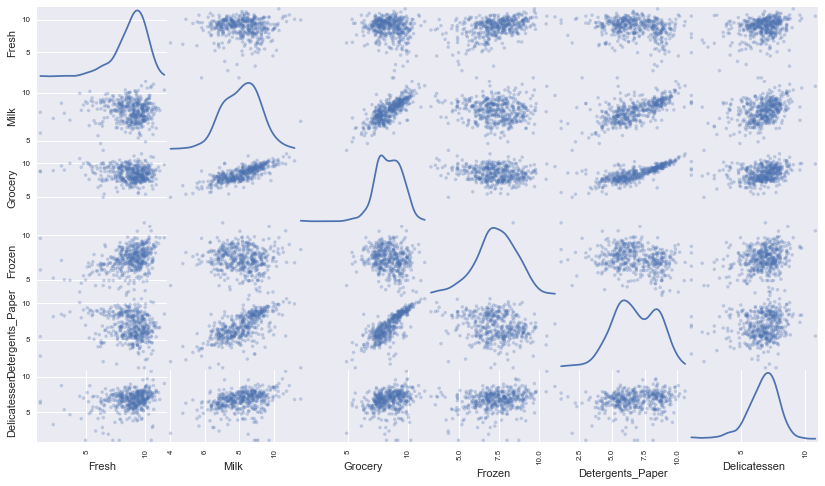

In [88]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [29]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.489662,10.555005,10.995377,8.087640,10.192456,7.609367
1,9.690604,8.349957,8.935245,5.303305,8.294799,4.043051
2,8.678632,8.725345,7.983781,6.732211,5.913503,8.406932


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [31]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print("\nData points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)


Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382



Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275



Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442



Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244



Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101



Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

The following data points are outliers in more than one feature, given the above results:
65, 66, 75, 128, 154

Let's look closely to these data points and see common characteristics, using the integer-location based indexing for selection by position "iloc" :

In [35]:
print(data.iloc[[65, 66, 75, 128, 154]])

     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
65      85  20959    45828      36             24231          1423
66       9   1534     7417     175              3468            27
75   20398   1137        3    4407                 3           975
128    140   8847     3823     142              1062             3
154    622     55      137      75                 7             8


It is obvious that there are distinct anomalies in these data. In particular:

1) Customer 65 buys 85 units of Fresh and 36 of Frozen (very low) but 20,959 units of Milk, 45,828!!! units of Grocery and 24,231 units of Detergents_Paper.

2) Customer 66 buys 9 units of Fresh and 27 of Delicatessen, but 7,417 units of Grocery and 1,534 units of Milk. 

3) Customer 75 buys 3 units of Grocery and Detergetents_Paper, but 20,398 units of Fresh? super weird.

4) Customer 128 buys 3 units of Delicatessen, 142 of Frozen, and 140 of Fresh, but also buys 8,847 units of Milk. 

5) Customer 154 buys 7 and 8 units of Detergents_Paper and Delicatessen respectively, 55 units of Milk and 75 of Frozen, 137 units of Grocery, and then all of a sudden buys 622 units of Fresh.

These are very large variations, and the general pattern of these customers' logs are that they tend to buy extremely low quantities of about half the features, and very large quantities of the other half features -- or get very low quantities of most features but an extremely large quantity (relatively) of one or two features. 

Consider the K-means algorithm with these outliers, where it first assigns random centers and then optimizes them by minimizing the squared distances of the center's neighboring points -- and repeats that process until all centers are optimized. Recall that this process highly depends on the initial conditions (that are usually random) for the center points. Thus, having outliers it will be very likely for a random initial center point to mistakenly assign the outlier close to a false group, or even worse to falsely affect the future positions of the center point due to a couple abnormal outliers, and end up with wrong clusters. 

Nevertheless, **we should not remove any data points just because they are outliers**. These data points might look like bizzare samples, however there is a possibility to represent customers that genuinely have these kind of spendings, that can be useful information for us to know. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

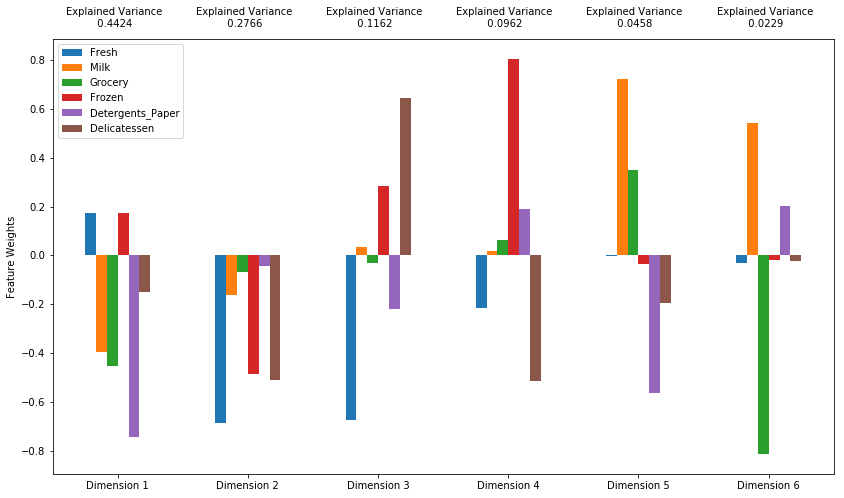

In [37]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

1) Total Explained variance of PC1 and PC2 = 0.4424 + 0.2766 = **0.719 or 71.90%**

2) Total Explained variance of PC1, PC2, PC3, and PC4 = 0.4424 + 0.2766 + 0.1162 + 0.0962 = **0.9314 OR 93.14%**

3) The dominant features of each dimension are as follows:

Dimension 1: { Detergents_Paper, Grocery, Milk }

Dimension 2: { Delicatessen, Frozen, Milk }

Dimension 3: { Delicatessen, Fresh, Detergents_Paper } 

Dimension 4: { Frozen, Delicatessen } 

Given the dominant feature of each Dimensions, I could "summarize" the dimensions (Principal Components) as:

PC1 : General Utilities Supplies

PC2 : General Food Supplies

PC3 : Food for instant consumption

PC4 : Food for long term consumption


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [38]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-4.3604,-2.7852,-1.0974,0.6292,0.5123,-0.1543
1,-1.2251,1.5185,-3.2435,-0.1471,0.0707,0.0942
2,0.2526,-0.6045,1.2207,-1.5262,0.4495,0.4955


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [39]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [40]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-4.3604,-2.7852
1,-1.2251,1.5185
2,0.2526,-0.6045


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

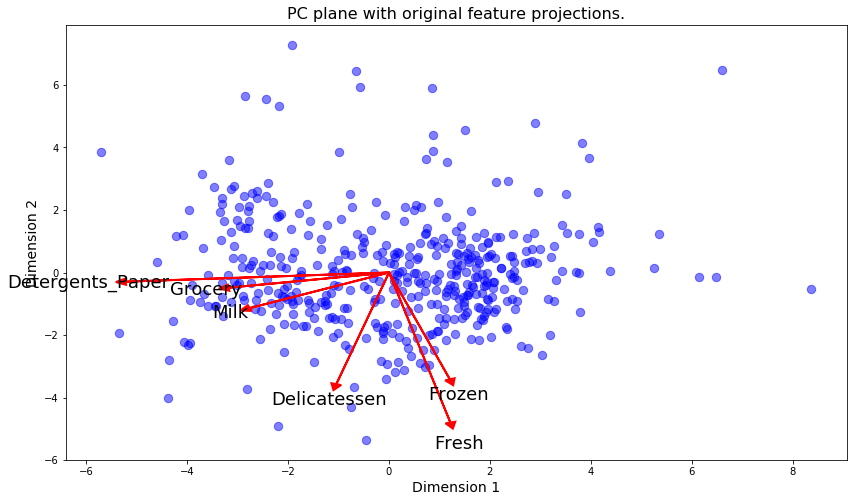

In [41]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**


#### K-Means Clustering

##### Description

A hill-climbing algorithm that randomly draws K cluster centers and then 1) assigns to them data points 2) optimizes this choice w.r.t the point squared distances to their corresponding center. Repeats until no further optimization is available.

##### Advantages

1) High-speed performance and robust

2) Measurable and efficient in large data collection

3) Gives best result when data set are distinct or well separated from each other (Gaussian)

4) Guaranteed to converge

5) Scale-invariant


#### Gaussian Mixture Model

##### Description

A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters.

##### Advantages

1) Fastest algorithm for learning mixture models

2) As this algorithm maximizes only the likelihood, it will not bias the means towards zero, or bias the cluster sizes to have specific structures that might or might not apply.

3) Can model elliptical clusters 


#### Best Algorithm for wholesale customer data

Since the data are not separated into clear clusters, the K-means algorithm might fall into a local optimum and not work as well. Since we don't want to leave this at chance, **I am choosing the Gaussian Mixture approach**, which we also expect to be faster and less biased. 



### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [91]:
from sklearn import mixture
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = mixture.GaussianMixture(n_components=6).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_
print("Cluster centers:\n", centers, "\n")

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)
print("\nSample Predictions: ", sample_preds, "\n")

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print("\nSilhouette score: ", score, "\n")

Cluster centers:
 [[ 1.81497951 -0.28961751]
 [-1.91396462 -0.59410743]
 [-0.02399734  0.29746614]
 [ 0.36785799 -1.97156682]
 [-2.97547474  1.14041509]
 [ 1.87684836  2.5357355 ]] 


Sample Predictions:  [1 1 2] 


Silhouette score:  0.29855409358 



### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

We can loop over a few cluster numbers and see the results of the above code:

In [92]:
print("******\nSilhouette Scores\n\n******\n")

best_score = []

for i in range(2,7) :
    print("*** No. of Components ", i, "***")
    
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = mixture.GaussianMixture(n_components=i, covariance_type='full').fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_
    print("Cluster centers:\n", centers, "\n")

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)
    print("Sample Predictions: ", sample_preds, "\n")

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    best_score.append(score)
    print("Silhouette score: ", score, "\n\n\n")
    
comp = best_score.index(max(best_score)) + 2
print("No. of Components with best score: ", comp, "\n\n=>")

# Now print the information of the best component

clusterer = GaussianMixture(n_components=comp).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)
print("\nSample Predictions: ", sample_preds, "\n")
score = silhouette_score(reduced_data, preds)
print("\nSilhouette score: ", score, "\n")

******
Silhouette Scores

******

*** No. of Components  2 ***
Cluster centers:
 [[-2.24401856  0.4965554 ]
 [ 1.16649267 -0.25812096]] 

Sample Predictions:  [0 0 1] 

Silhouette score:  0.410366734627 



*** No. of Components  3 ***
Cluster centers:
 [[ 0.26417989  1.26191602]
 [ 1.25244579 -0.32388226]
 [-2.1746054  -0.06795185]] 

Sample Predictions:  [0 2 1] 

Silhouette score:  0.412196880541 



*** No. of Components  4 ***
Cluster centers:
 [[ 0.65057978  0.8148637 ]
 [ 1.35462676 -0.48207179]
 [-1.50118465 -0.3012657 ]
 [-3.06703686  1.21816619]] 

Sample Predictions:  [3 2 1] 

Silhouette score:  0.301069301051 



*** No. of Components  5 ***
Cluster centers:
 [[ 1.38286964 -1.05714813]
 [-2.86100221  2.08720984]
 [ 1.11013855  0.36746142]
 [ 1.51136109  2.86120227]
 [-1.93744856 -0.50422254]] 

Sample Predictions:  [4 4 2] 

Silhouette score:  0.258756129684 



*** No. of Components  6 ***
Cluster centers:
 [[ 1.432891   -1.0903131 ]
 [-2.94688881  1.35748731]
 [ 1.519402

Recall that the Silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). Thus, having 3 three clusters i.e. segmenting the customers into three clusters gives higher similarity score to each customer for being clustered there --> 3 clusters segment the customers best.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

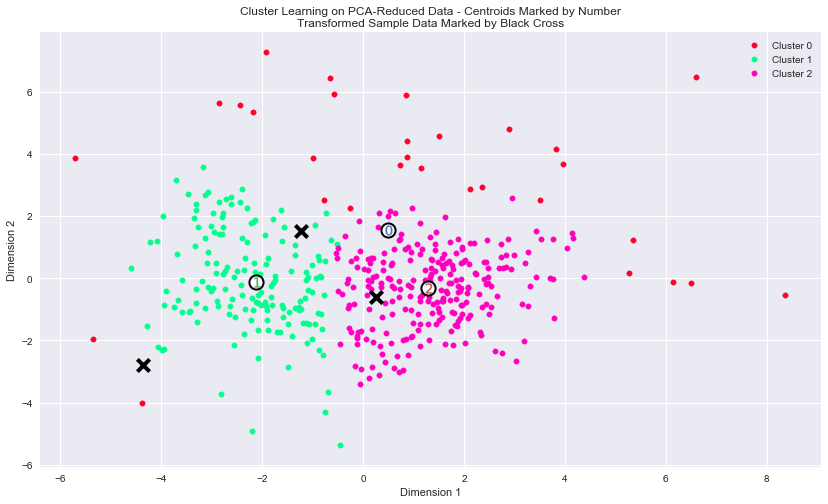

In [93]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [94]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,2343.0,2162.0,3339.0,760.0,578.0,333.0
Segment 1,4660.0,7942.0,12282.0,1092.0,4343.0,1149.0
Segment 2,9616.0,2139.0,2649.0,2159.0,346.0,762.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

Recall the mean values of each feature are:

Fresh: 12000.29, Milk: 5796.2, Grocery: 3071.9, Frozen: 3071.93, Detergents_paper: 2881.4, Delicatessen: 1524.8

Each segment represents a cluster of clients, with certain characteristics. Given the results we obtained, we get 3 main clusters of clients, namely:

**Cluster 0: Hotel**

Clients of this segment consume a lot of food supplies that possibly use for breakfast/lunch/dinner, as well as a lot of cleaning supplies for dailiy cleaning. In particular:

1) Fresh: 32% of an average client -- not too many instant-consumption foods

2) Milk: 146% of an average client -- lots of dairy for breakfast

3) Grocery: 442% of an average client -- lots of general food supplies to feed the guests

4) Frozen: 30% of an average client -- not too many long-term-consumption foods

5) Detergents_Paper: 180% of an average client -- more than the average consumption of cleaning supplies

6) Delicatessen: 70% of an average client -- some deli foods, possibly at a mini-bar


**Cluster 1: Average-sized Supermarkets**

Clients of this segment consume a lot of foods, but relatively low cleaning and utilities supplies, as well as limited deli food. In particular:

1) Fresh: 27% of an average client -- decent amount of fresh goods

2) Milk: 42% of an average client -- relatively low amount of dairy products (limited fridge space)

3) Grocery: 119% of an average client -- more than average general food supplies

4) Frozen: 32% of an average client -- some frozen goods (in the limited fridge space)

5) Detergents_Paper: 22% of an average client -- some cleaning supplies to clean the place

6) Delicatessen: 29% of an average client -- perhaps a mini-deli or a ready-food section


**Cluster 2: Cafeterias/Restaurants**

Clients of this segment consume less than average in all categories of goods, which reflects the small size of a restaurant with respect to other larger retailers, such as supermarkets. 

1) Fresh: 82% of an average client -- decent amount of fresh goods

2) Milk: 39% of an average client -- not that much of dairy

3) Grocery: 92% of an average client -- a lot of general food supplies

4) Frozen: 71% of an average client -- decent amount of foods

5) Detergents_Paper: 13% of an average client -- some cleaning supplies for daily use

6) Delicatessen: 53% of an average client -- average supplies of cold sandwiches and ready-food

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [95]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)
    
print("\n", samples)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 2

    Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  35942  38369    59598    3254             26701          2017
1  16165   4230     7595     201              4003            57
2   5876   6157     2933     839               370          4478


**Answer:**

1) Sample point 0:

Cluster 1 ~> Average-sized supermarket: high consumption of foods and cleaning supplies

2) Sample point 1:

Cluster 1 ~> Average-sized supermarket: high consumption of foods and cleaning supplies

3) Sample point 2: 

Cluster 2 ~> Cafeteria/Restaurant: some cleaning supplies, and mostly food and deli-like goods consumption


These points look consistent with the clustering above. Of course, the results are never perfect, but they do look consistent enough with my assumptions. 

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

A/B testing is a method of comparing two versions (delivery strategies in our case) against each other to determine which one performs better. In this case, since we generalized the customers in three segments, we can start by asking the customers of different segments, record their reactions, and test the following hypotheses:

Test 1:

H_0 := customers of same segment react similarly

H_1 := no pattern of reactions across segments


Then:

If H_1 is rejected ~> Only change the policy to segments that react positively

If H_0 is rejected ~> from the recorded responses, try to form different clusters that describe general patterns with respect to the new policy, as in: segment1' = {customers who react positively} and segment2' = {customers who react negatively}. Then change the policy to segment1'.


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

**Unsupervised Approach**

Depending on the algorithm we are using, we can plot the data point and calculate its distance from all the existing cluster centers. In K-means algorithm, we would compute the squared distance for example.

**Supervised Approach**

Since each customer in the data set is assigned a cluster, we can train a supervised classifier (SVM or KNN) on these "engineered" features, and then treat the new point as in the supervised case. With decision trees that might take O(# features) time in worst case, and O( log(# features) ) on average, depending on how well our data split. Recall that classifiers are fast learners but slow predictors, vs the regression which is slow learner but fast predictor of O(1).

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

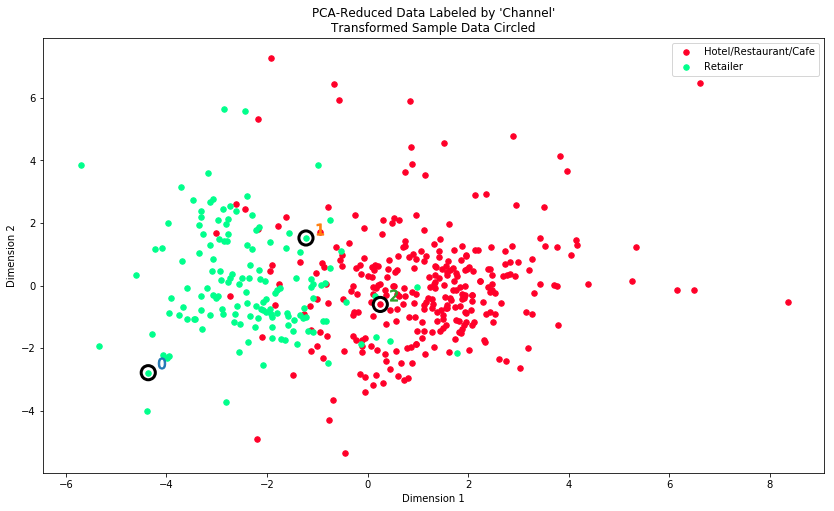

In [83]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

1) It looks like the data strongly correlate with the predicted clusters earlier, with a few exceptions -- outliers or anomalies in the data, that is, some retailers appear deep in the HoReCa region.

2) Although the data points kind of blend with each other in the middle of the cloud and there is no distinct separator, it will be tough to easily classify a new "average" point as "HoReCa" or "Retailers", however if a new point appears in the top right of the plot should confidently be classified as "HoReCa", and if a new point appears in the middle-bottom left of the plot should confidently be classified as "Retailers".

3) Yes. The segments I predicted were mostly about hotels and restaurants-cafeterias (HoReCa), and supermarkets (Retailers), so it looks like my predictions were mostly accurate. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.